# 生成した乱数の確率分布

C++で生成した乱数列のファイル
- `result/uni`: U(0,1)
- `result/norm`: N(0,1)
- `result/exp`: Exp(1)

これらを下記コマンドで1つのファイル `result/rand_arrays` にまとめた．

```sh
$ cd result
$ echo "uni,norm,exp" > rand_arrays.csv
$ paste -d, uni norm exp >> rand_arrays.csv
$ head -n5 rand_arrays.csv 
uni,norm,exp
0.997185,0.263432,0.855473
0.932557,-0.229653,0.637446
0.128124,3.00901,0.772468
0.999041,-0.922904,1.07197
```

各乱数列について，CDFとPDFを描画する．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')


In [2]:
path = '../result/rand_arrays.csv'
rand_arrays = pd.read_csv(path)
rand_arrays.head()

,uni,norm,exp
0,0.997185,0.263432,0.855473
1,0.932557,-0.229653,0.637446
2,0.128124,3.009010,0.772468
3,0.999041,-0.922904,1.071970
4,0.236089,-0.599964,2.451310


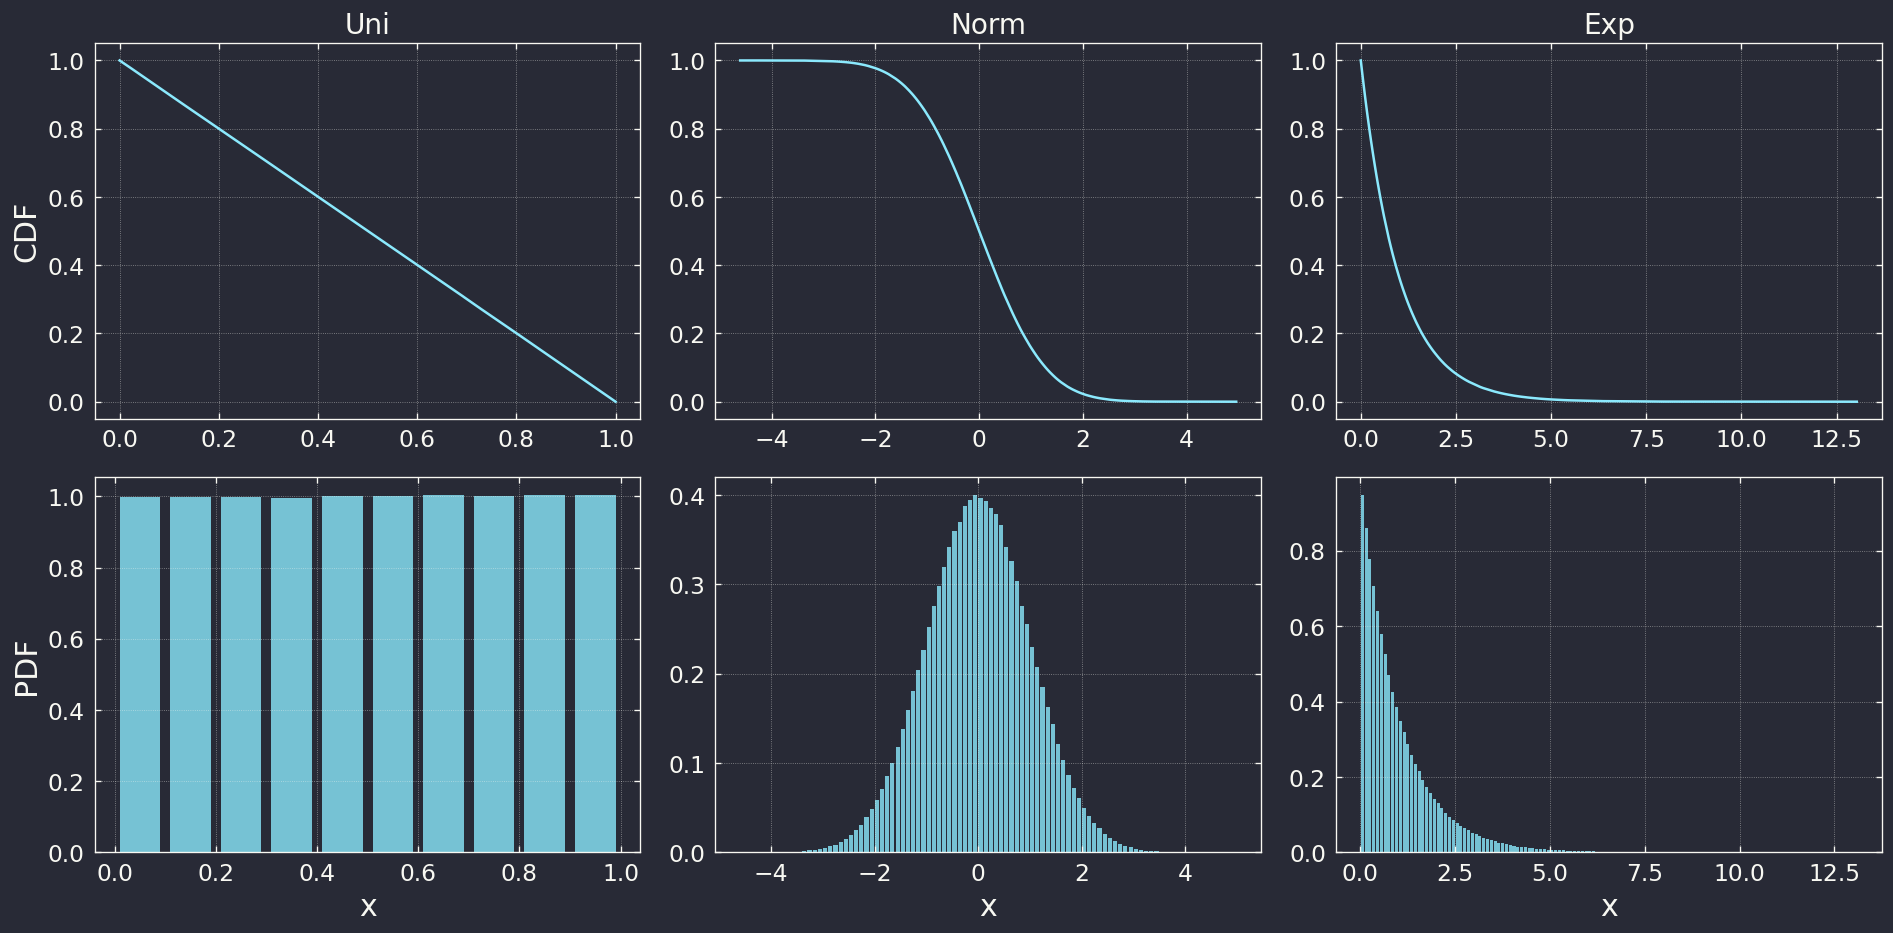

In [4]:
def draw_cdf(xs, ax=None, set_xlabel=True, set_ylabel=True, title=None):
    if not ax: return
    n = len(xs)
    cdf = [(i+1)/n for i in range(n)]
    ax.plot(sorted(xs, reverse=True), cdf)
    if set_xlabel: ax.set_xlabel('x')
    if set_ylabel: ax.set_ylabel('CDF')
    if title: ax.set_title(title)

def draw_pdf(xs, ax=None, set_xlabel=True, set_ylabel=True, title=None, xmin=None, dx=1.0, kind='line', alpha=1.0):
    # xs  : データの１次元配列
    # xmin: ヒストグラムの左端の点（Noneなら xs の最小値を使う）
    # dx  : bin幅

    if not ax: return
    
    if not xmin:
        xmin = min(xs)
    nbin = int((max(xs) - xmin) / dx) + 1  # binの数
    labels = xmin + dx/2 + np.arange(nbin)*dx
    counts = np.zeros(nbin)

    for x in xs:
        i = int((x-xmin) / dx)
        counts[i] += 1

    N = len(xs) * dx # 規格化定数
    densities = counts / N
    
    if kind == 'line':
        ax.plot(labels, densities, marker='o', alpha=alpha)
    if kind == 'bar':
        width = 0.8
        if len(labels) > 1:
            dx = labels[1] - labels[0]
            width *= dx
        ax.bar(labels, densities, width=width, alpha=alpha)
    
    if set_xlabel: ax.set_xlabel('x')
    if set_ylabel: ax.set_ylabel('PDF')
    if title: ax.set_title(title)

_, axes = plt.subplots(2, 3, figsize=(16,8))
for i, col in enumerate(rand_arrays.columns):
    draw_cdf(rand_arrays[col], ax=axes[0,i], set_xlabel=False, set_ylabel=(i==0), title=col.capitalize())
    draw_pdf(rand_arrays[col], ax=axes[1,i], set_xlabel=True,  set_ylabel=(i==0), title=None, dx=0.1, kind='bar', alpha=0.8)
plt.tight_layout()
plt.savefig('../rand_dist.png')